In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

In [9]:
df = pd.get_dummies(df,drop_first = True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Some insights about the target variable 

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

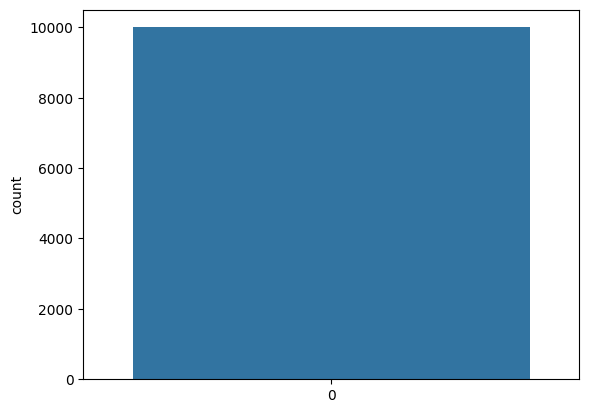

In [12]:
sns.countplot(df['Exited'])

In [13]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Handling Imbalanced Data with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [16]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: ylabel='count'>

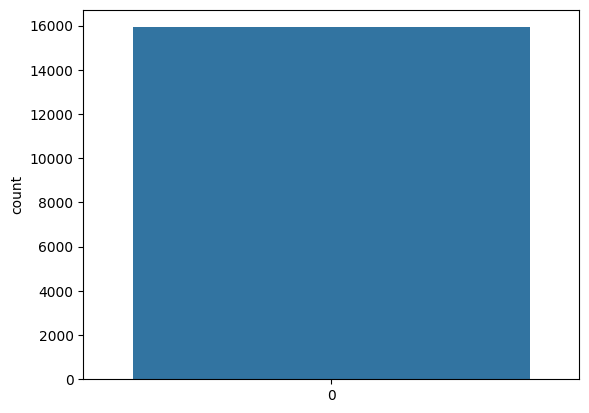

In [17]:
sns.countplot(y_res)

## Splitting The Dataset into Training Set and Test Set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.77404034, -0.90390882,  0.78926728, ..., -0.57334516,
         2.17998211, -0.83986275],
       [-0.67213719, -0.80385545,  1.15609591, ..., -0.57334516,
        -0.45871936,  1.19067074],
       [-1.31853472,  0.1966783 ,  0.78926728, ..., -0.57334516,
         2.17998211,  1.19067074],
       ...,
       [-1.0008139 , -0.10348183,  0.42243864, ..., -0.57334516,
        -0.45871936, -0.83986275],
       [ 0.48918719, -1.0039622 , -1.41170452, ..., -0.57334516,
        -0.45871936,  1.19067074],
       [ 1.65051157,  2.19774579, -1.41170452, ..., -0.57334516,
        -0.45871936, -0.83986275]])

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()

In [26]:
log.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred1 = log.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred1)

0.7745918794474675

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_test, y_pred1)

0.7607615894039735

In [32]:
recall_score(y_test, y_pred1)

0.7864783910997005

In [33]:
f1_score(y_test,y_pred1)

0.7734062697243846

## SVC

In [34]:
from sklearn import svm

In [35]:
svm = svm.SVC()

In [36]:
svm.fit(X_train,y_train)

SVC()

In [37]:
y_pred2=svm.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred2)

0.8241942235244872

In [39]:
precision_score(y_test, y_pred2)

0.8216587881392351

In [40]:
recall_score(y_test, y_pred2)

0.8181429182712879

In [41]:
f1_score(y_test,y_pred2)

0.8198970840480275

## KNeighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred3=knn.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred3)

0.8091251569694433

In [47]:
precision_score(y_test, y_pred3)

0.7888123226591002

In [48]:
recall_score(y_test, y_pred3)

0.832691484809585

In [49]:
f1_score(y_test,y_pred3)

0.8101582014987511

## Desicion Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred4=dt.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred4)

0.789242360820427

In [55]:
precision_score(y_test, y_pred4)

0.7839453458582408

In [56]:
recall_score(y_test, y_pred4)

0.785622593068036

In [57]:
f1_score(y_test,y_pred4)

0.784783073306262

## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred5=rf.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred5)

0.8457513604018417

In [63]:
precision_score(y_test, y_pred5)

0.8404255319148937

In [64]:
recall_score(y_test, y_pred5)

0.8451005562687206

In [65]:
f1_score(y_test,y_pred5)

0.842756560699808

## Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier()

In [68]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [69]:
y_pred6=gbc.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred6)

0.8290079531184597

In [71]:
precision_score(y_test,y_pred6)

0.8253424657534246

In [72]:
recall_score(y_test,y_pred6)

0.8249893025246042

In [73]:
f1_score(y_test,y_pred6)

0.8251658463513803

## XGBoost

In [74]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
y_pred7=model_xgb.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred7)

0.8532858936793638

In [77]:
precision_score(y_test,y_pred7)

0.8436974789915966

In [78]:
recall_score(y_test,y_pred6)

0.8249893025246042

In [79]:
f1_score(y_test,y_pred6)

0.8251658463513803

### Accuracy Summary

In [80]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [81]:
performance_summary

,Model,ACC
0,LR,0.774592
1,SVC,0.824194
2,KNN,0.809125
3,DT,0.789242
4,RF,0.845751
5,GBC,0.829008
6,XGB,0.853286


In [83]:
pip install seaborn matplotlib

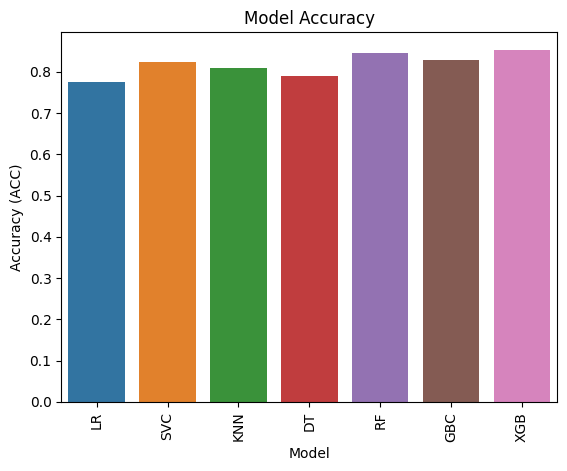

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='ACC', data=performance_summary)
plt.xlabel('Model')
plt.ylabel('Accuracy (ACC)')
plt.title('Model Accuracy')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.show()

As we can see, XGBoost Classifier has highest accuracy

In [85]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [86]:
performance_summary

,Model,PRECISION
0,LR,0.760762
1,SVC,0.821659
2,KNN,0.788812
3,DT,0.783945
4,RF,0.840426
5,GBC,0.825342
6,XGB,0.825342


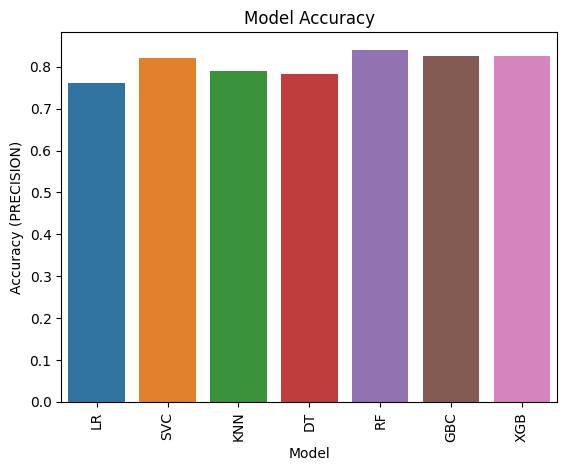

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='PRECISION', data=performance_summary)
plt.xlabel('Model')
plt.ylabel('Accuracy (PRECISION)')
plt.title('Model Accuracy')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.show()

## Saving the best model, XGBoost

In [88]:
X_train = sc.fit_transform(X_train)

In [89]:
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [90]:
import joblib

In [91]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [92]:
model = joblib.load('churn_predict_model')

In [93]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')